In [54]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [55]:
df = pd.read_csv('diabetes.csv')

<AxesSubplot:>

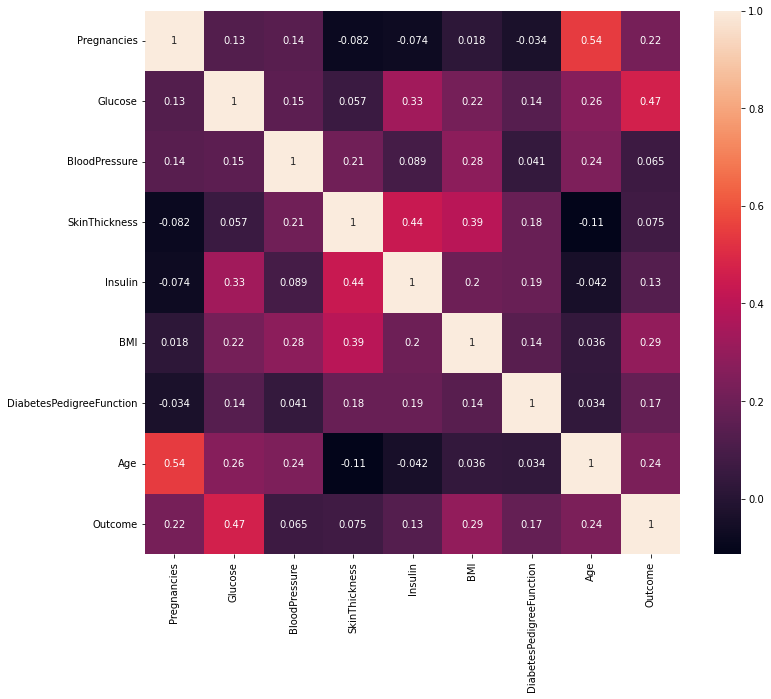

In [56]:
# correlation matrix
# remember, higher number, closer to 1 means stronger correlation. Negative values mean negative correlation

# what are some good features to try?

import seaborn as sns
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

# Splitting into Training and Test Sets

In [78]:
y = df['Outcome']
x = df[['Age', 'Pregnancies', 'Glucose', 'Insulin']].values

In [79]:
from sklearn.model_selection import train_test_split

# split the data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=104, test_size=0.20, shuffle=True)

print("x values")
print("{0:0.2f}% in training set".format((len(x_train)/len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(x_test)/len(df.index)) * 100))

print("y values")
print("{0:0.2f}% in training set".format((len(y_train)/len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(y_test)/len(df.index)) * 100))

x values
79.95% in training set
20.05% in test set
y values
79.95% in training set
20.05% in test set


In [80]:
# instantiate a model - use multinomial because we are dealing with words
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()

classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

# Accuracy Score

In [81]:
# calculate Accuracy - the percentage of labels that the model predicted correctly

from sklearn import metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy: 0.5714


# Confusion Matrix

In [83]:
from sklearn.metrics import confusion_matrix

# display the confusion matrix
#
# TP FP
# FN TN

confusion_matrix(y_test, y_pred)

array([[65, 41],
       [25, 23]], dtype=int64)

Prediction on test data:



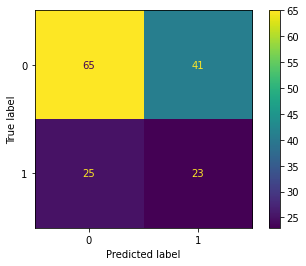

In [85]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
print('Prediction on test data:\n')
disp.plot()
plt.show()